<b style="font-size:20px">Netflix Modeling</b>

<b style="font-size:17px">Data Cleaning</b>

In [1]:
#importing the required libraries and loading netflix dataset


import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn 
%matplotlib inline
import scipy.stats as stats
import warnings
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


# Ignore all warnings
warnings.filterwarnings('ignore')


#loading the dataset
netflix_df = pd.read_csv("/Users/sudhamshuvidyananda/Documents/Data Mining ALY 6040/Module 2/Individual Assignment/Netflix_Modeling.csv")
netflix_df



,User ID,Date,Day,Show,Season,Episode,Time Watched,Gender,Completed,Time of Day
0,62565,2/9/2019,Saturday,Stranger Things,2.0,10.0,59.0,Female,1.0,1.0
1,108824,2/9/2019,Saturday,Stranger Things,1.0,4.0,40.0,Female,0.0,1.0
2,118833,2/9/2019,Saturday,Stranger Things,2.0,8.0,51.0,Male,1.0,1.0
3,97717,2/9/2019,Saturday,Stranger Things,2.0,6.0,10.0,Male,0.0,0.0
4,35588,2/9/2019,Saturday,Stranger Things,2.0,10.0,40.0,Female,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...
2999,92883,2/12/2019,Tuesday,American Horror Story,3.0,7.0,13.0,Male,0.0,1.0
3000,72774,2/12/2019,Tuesday,American Horror Story,1.0,9.0,24.0,Male,0.0,0.0
3001,7517,2/12/2019,Tuesday,American Horror Story,2.0,9.0,26.0,Male,1.0,0.0
3002,16293,2/12/2019,Tuesday,American Horror Story,3.0,1.0,23.0,Male,0.0,1.0


In [212]:
#statistical description of the dataset
netflix_df.describe()

,User ID,Season,Episode,Time Watched,Completed,Time of Day
count,3004.000000,2969.000000,2986.000000,2987.000000,2957.000000,2904.000000
mean,62342.952064,2.788144,5.489618,24.171075,0.264457,0.494835
std,36065.318815,1.836268,2.884033,16.371438,0.441118,0.500059
min,66.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,30984.750000,1.000000,3.000000,11.000000,0.000000,0.000000
50%,62082.500000,2.000000,6.000000,21.000000,0.000000,0.000000
75%,93862.000000,4.000000,8.000000,34.000000,1.000000,1.000000
max,124938.000000,10.000000,10.000000,90.000000,1.000000,1.000000


NameError: name 'mean' is not defined

In [213]:
#shape and type (variable info) of the dataset
netflix_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3004 entries, 0 to 3003
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   User ID       3004 non-null   int64  
 1   Date          3004 non-null   object 
 2   Day           3004 non-null   object 
 3   Show          3004 non-null   object 
 4   Season        2969 non-null   float64
 5   Episode       2986 non-null   float64
 6   Time Watched  2987 non-null   float64
 7   Gender        2905 non-null   object 
 8   Completed     2957 non-null   float64
 9   Time of Day   2904 non-null   float64
dtypes: float64(5), int64(1), object(4)
memory usage: 234.8+ KB


In [214]:
#checking for null/missing value in the dataset
netflix_df.isnull().sum()

User ID           0
Date              0
Day               0
Show              0
Season           35
Episode          18
Time Watched     17
Gender           99
Completed        47
Time of Day     100
dtype: int64

In [215]:
# finding all the missing data and summing them based on each column and storing it in a dataset
totl = netflix_df.isnull().sum().sort_values(ascending = False)
# Finding the percentage of the missing data by diving the number of missing values with total and  storing it in a dataframe
percent = (netflix_df.isnull().sum()/ netflix_df.isnull().count()*100).sort_values(ascending = False)
# Concatinating both the above datasets
netflix_missing_dt  = pd.concat([totl, round(percent,1)], axis=1, keys=['Total', 'Percentage'])
# Printing the dataset
netflix_missing_dt 

,Total,Percentage
Time of Day,100,3.3
Gender,99,3.3
Completed,47,1.6
Season,35,1.2
Episode,18,0.6
Time Watched,17,0.6
User ID,0,0.0
Date,0,0.0
Day,0,0.0
Show,0,0.0


In [216]:
# Cleaning Season Column by replacing null values with the mode by grouping each show
#This will help in getting an accurate value for the column and not miss out on important info
def get_first_mode(series):
    return series.mode().iloc[0]

# Group the data by 'Show' and calculate the mode of 'Season' for each show, ensuring only one mode is returned
mode_season_per_show = netflix_df.groupby('Show')['Season'].agg(get_first_mode)

# Function to impute mode
def impute_mode(row):
    if pd.isna(row['Season']):
        return mode_season_per_show[row['Show']]
    else:
        return row['Season']

# Apply the function to impute missing 'Season' values
netflix_df['Season'] = netflix_df.apply(impute_mode, axis=1)

# Check for any remaining missing values
remaining_missing_values = netflix_df.isnull().sum()
print(remaining_missing_values)


User ID           0
Date              0
Day               0
Show              0
Season            0
Episode          18
Time Watched     17
Gender           99
Completed        47
Time of Day     100
dtype: int64


In [217]:
# Cleaning Episode Column by replacing null values with the mode by grouping each show and season
#This will help in getting an accurate value for the column and not miss out on important info
def get_first_mode(series):
    return series.mode().iloc[0]

# Group the data by 'Show' and 'Season', and calculate the mode of 'Episode' for each group
mode_episode_per_show_season = netflix_df.groupby(['Show', 'Season'])['Episode'].agg(get_first_mode)

# Define a function to impute mode for 'Episode'
def impute_episode_mode(row):
    if pd.isna(row['Episode']):
        # Use .get() to handle cases where the (show, season) combination might not exist in the mode mapping
        return mode_episode_per_show_season.get((row['Show'], row['Season']))
    else:
        return row['Episode']

# Apply the function to impute missing 'Episode' values
netflix_df['Episode'] = netflix_df.apply(impute_episode_mode, axis=1)

# Check for any remaining missing values
remaining_missing_values = netflix_df.isnull().sum()
print(remaining_missing_values)


User ID           0
Date              0
Day               0
Show              0
Season            0
Episode           0
Time Watched     17
Gender           99
Completed        47
Time of Day     100
dtype: int64


In [218]:
# Cleaning Time Watched Column by replacing null values with the mode by grouping each show, season and episode
#This will help in getting an accurate value for the column and not miss out on important info
median_time_watched_per_show_season_episode = netflix_df.groupby(['Show', 'Season', 'Episode'])['Time Watched'].median()

# Define a function to impute median for 'Time Watched'
def impute_time_watched_median(row):
    if pd.isna(row['Time Watched']):
        # Use .get() to handle cases where the (show, season, episode) combination might not exist in the median mapping
        return median_time_watched_per_show_season_episode.get((row['Show'], row['Season'], row['Episode']))
    else:
        return row['Time Watched']

# Apply the function to impute missing 'Time Watched' values
netflix_df['Time Watched'] = netflix_df.apply(impute_time_watched_median, axis=1)

# Check for any remaining missing values
remaining_missing_values = netflix_df.isnull().sum()
print(remaining_missing_values)


User ID           0
Date              0
Day               0
Show              0
Season            0
Episode           0
Time Watched      0
Gender           99
Completed        47
Time of Day     100
dtype: int64


In [219]:
# Cleaning Gender Column by replacing null values with the mode by grouping each show, season and Episode
#This will help in getting an accurate value for the column and not miss out on important info
def get_first_mode(series):
    return series.mode().iloc[0]

# Group the data by 'Show' and 'Season', and calculate the mode of 'Episode' for each group
mode_gender_per_show_season = netflix_df.groupby(['Show', 'Season','Episode'])['Gender'].agg(get_first_mode)

# Define a function to impute mode for 'Episode'
def impute_episode_mode(row):
    if pd.isna(row['Gender']):
        # Use .get() to handle cases where the (show, season) combination might not exist in the mode mapping
        return mode_gender_per_show_season.get((row['Show'], row['Season'], row['Episode']))
    else:
        return row['Gender']

# Apply the function to impute missing 'Episode' values
netflix_df['Gender'] = netflix_df.apply(impute_episode_mode, axis=1)

# Check for any remaining missing values
remaining_missing_values = netflix_df.isnull().sum()
print(remaining_missing_values)


User ID           0
Date              0
Day               0
Show              0
Season            0
Episode           0
Time Watched      0
Gender            0
Completed        47
Time of Day     100
dtype: int64


In [220]:
# Cleaning Completed Column by replacing null values with the mode by grouping each show, season and Episode and having a 
#placeholder for time watched 
#This will help in getting an accurate value for the column and not miss out on important info
average_time_watched_per_show_season_episode = netflix_df.groupby(['Show', 'Season', 'Episode'])['Time Watched'].mean()

# Define a function to impute values for 'Completed'
def impute_completed(row):
    if pd.isna(row['Completed']):
        # Use .get() to handle cases where the (show, season, episode) combination might not exist in the average mapping
        avg_time = average_time_watched_per_show_season_episode.get((row['Show'], row['Season'], row['Episode']))
        if avg_time is not None and avg_time >= 45:
            return 1
        else:
            return 0
    else:
        return row['Completed']

# Apply the function to impute missing 'Completed' values
netflix_df['Completed'] = netflix_df.apply(impute_completed, axis=1)

# Check for any remaining missing values
remaining_missing_values = netflix_df.isnull().sum()
print(remaining_missing_values)


User ID           0
Date              0
Day               0
Show              0
Season            0
Episode           0
Time Watched      0
Gender            0
Completed         0
Time of Day     100
dtype: int64


In [221]:
# Cleaning Time of Day Column by replacing null values with the mode by grouping each show, season and Episode
#This will help in getting an accurate value for the column and not miss out on important info
def get_first_mode(series):
    if len(series.mode()) > 0:
        return series.mode().iloc[0]
    else:
        return 0

# Group the data by 'Show', 'Season', and 'Episode', and calculate the mode of 'Time of Day' for each group
mode_time_of_day_per_show_season_episode = netflix_df.groupby(['Day','Show', 'Season', 'Episode'])['Time of Day'].agg(get_first_mode)

# Define a function to impute mode for 'Time of Day'
def impute_time_of_day_mode(row):
    if pd.isna(row['Time of Day']):
        # Use .get() to handle cases where the (show, season, episode) combination might not exist in the mode mapping
        return mode_time_of_day_per_show_season_episode.get((row['Day'],row['Show'], row['Season'], row['Episode']), pd.NA)
    else:
        return row['Time of Day']

# Apply the function to impute missing 'Time of Day' values
netflix_df['Time of Day'] = netflix_df.apply(impute_time_of_day_mode, axis=1)

# Check for any remaining missing values
remaining_missing_values = netflix_df.isnull().sum()
print(remaining_missing_values)


User ID         0
Date            0
Day             0
Show            0
Season          0
Episode         0
Time Watched    0
Gender          0
Completed       0
Time of Day     0
dtype: int64


In [222]:
#checking for special characters

netflix_df.isin(['!@#$%^&*(),.?":{}|<>']).sum(axis=0)

User ID         0
Date            0
Day             0
Show            0
Season          0
Episode         0
Time Watched    0
Gender          0
Completed       0
Time of Day     0
dtype: int64

In [223]:
#checking for duplicates

if netflix_df.duplicated().any():
    print("There are duplicates")
else:
    print("No duplicates found")

No duplicates found


In [224]:
#converting required variable datatype from the dataset 
netflix_df['Date'] = pd.to_datetime(netflix_df['Date'])
netflix_df['Season'] = netflix_df['Season'].astype(int)
netflix_df['Episode'] = netflix_df['Episode'].astype(int)
netflix_df['Time Watched'] = netflix_df['Time Watched'].astype(int)
netflix_df['Completed'] = netflix_df['Completed'].astype(int)
netflix_df['Time of Day'] = netflix_df['Time of Day'].astype(int)

In [225]:
#checking for outliers

# Define a function to detect outliers using IQR
def detect_outliers(dataframe, column_name):
    Q1 = dataframe[column_name].quantile(0.25)
    Q3 = dataframe[column_name].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    outliers = dataframe[(dataframe[column_name] < lower_bound) | (dataframe[column_name] > upper_bound)]
    return outliers

# Numeric columns to check for outliers
numeric_columns = ['Season', 'Episode', 'Time Watched', 'Completed', 'Time of Day','User ID']

outliers_data = {}

# Detect outliers for each numeric column
for column in numeric_columns:
    outliers = detect_outliers(netflix_df, column)
    outliers_data[column] = len(outliers)

outliers_data


{'Season': 61,
 'Episode': 0,
 'Time Watched': 6,
 'Completed': 0,
 'Time of Day': 0,
 'User ID': 0}

<b style="font-size:17px">Exploratory Data Analysis</b>

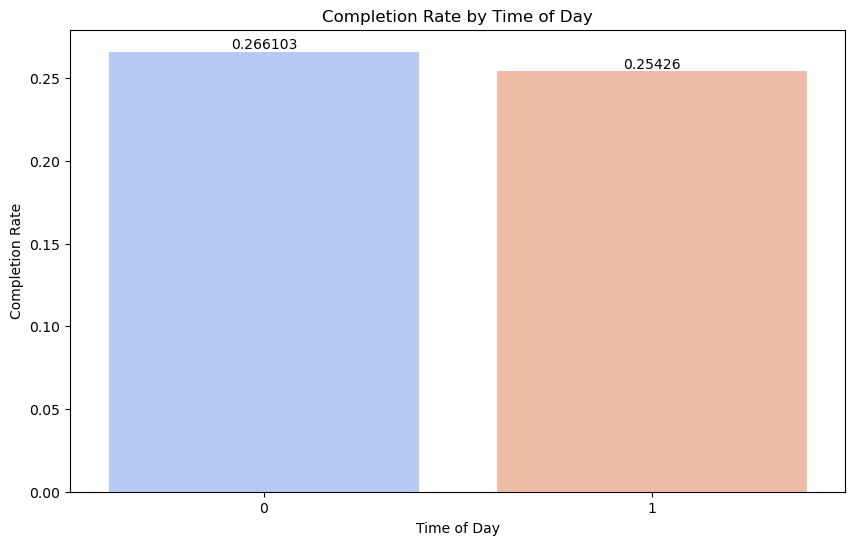

In [240]:
# Overall completion rate
overall_completion_rate = netflix_df['Completed'].mean()

# Completion rate by Time of Day
completion_rate_by_time = netflix_df.groupby('Time of Day')['Completed'].mean()

import matplotlib.pyplot as plt
import seaborn as sns

# Bar chart
plt.figure(figsize=(10, 6))
ax=sns.barplot(x=completion_rate_by_time.index, y=completion_rate_by_time.values, palette ='coolwarm')
for j in ax.containers:
        ax.bar_label(j)
plt.title('Completion Rate by Time of Day')
plt.xlabel('Time of Day')
plt.ylabel('Completion Rate')
plt.show()


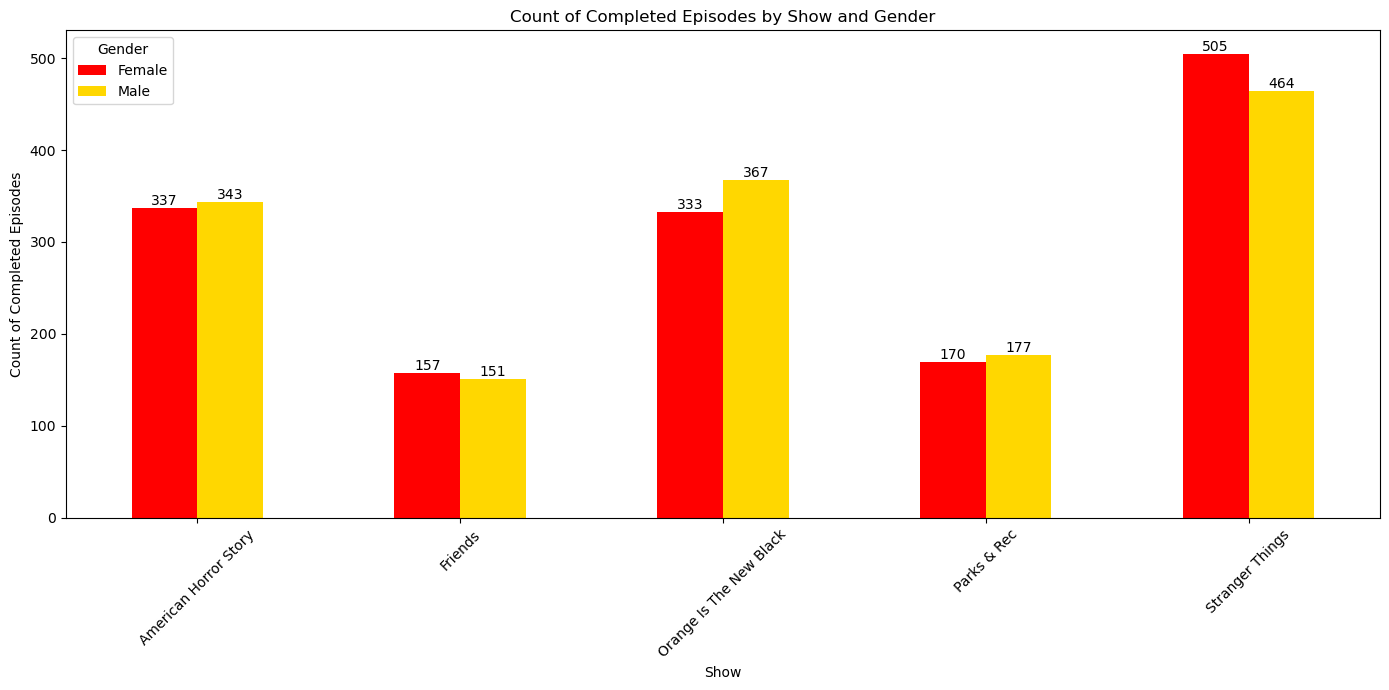

In [227]:
# Hypothesis 1 Visualization: Grouped Bar Chart for Show Preference by Gender
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

show_gender_crosstab = pd.crosstab(index=netflix_df['Show'], columns=netflix_df['Gender'])

# Plot a grouped bar chart using the crosstab result
ax = show_gender_crosstab.plot(kind='bar', figsize=(14, 7), stacked=False, color =['red','gold'])

# Adding the count labels on top of the bars
for container in ax.containers:
    ax.bar_label(container, fmt='%.0f')  # No decimal places

# Finalizing the plot
plt.title('Count of Completed Episodes by Show and Gender')
plt.xlabel('Show')
plt.ylabel('Count of Completed Episodes')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust layout to fit labels
plt.show()



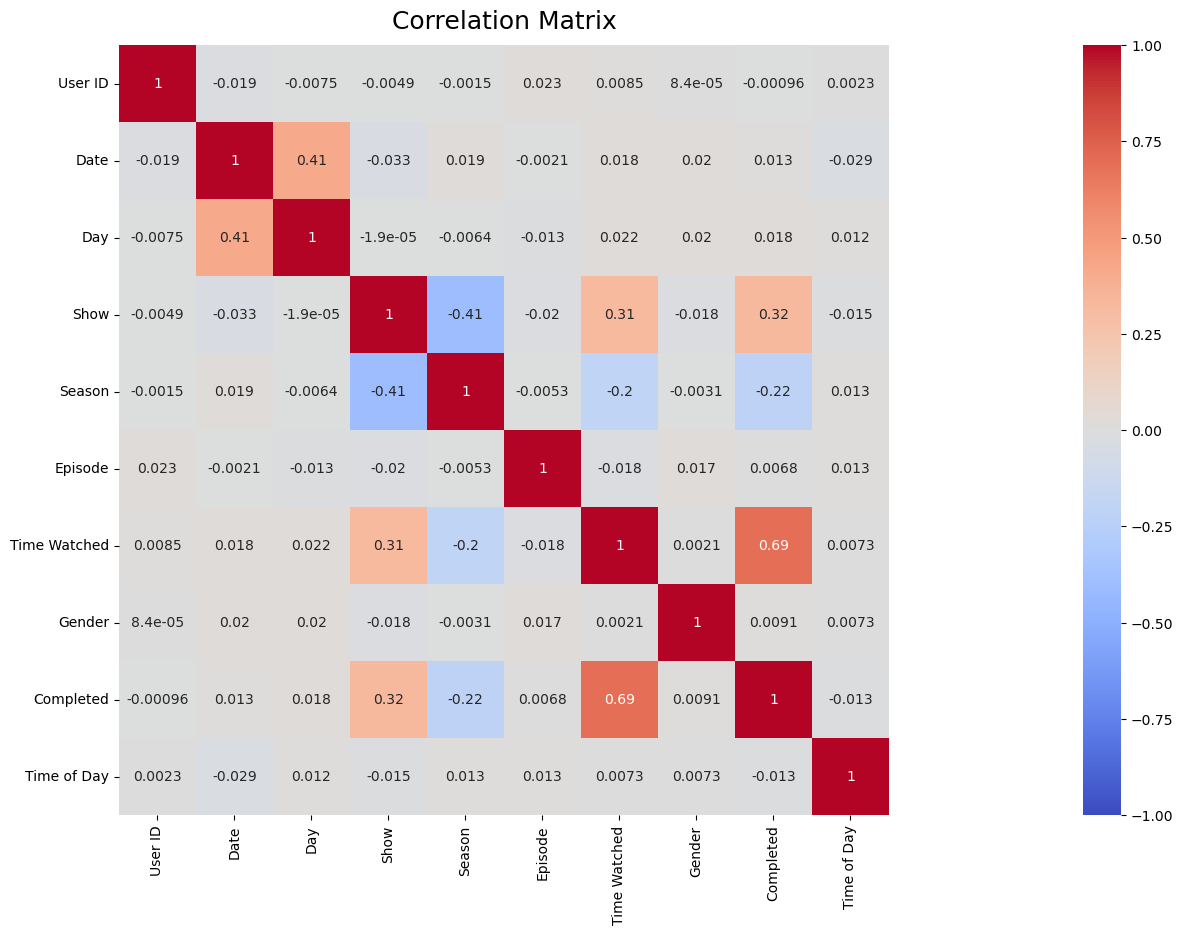

In [232]:
#correlation matrix

#labelencoder

from sklearn.preprocessing import LabelEncoder

le=LabelEncoder()


label1=le.fit_transform(netflix_df['Gender'])
netflix_df.drop('Gender',axis=1)
netflix_df['Gender']=label1

label2=le.fit_transform(netflix_df['Date'])
netflix_df.drop('Date',axis=1)
netflix_df['Date']=label2

label3=le.fit_transform(netflix_df['Day'])
netflix_df.drop('Day',axis=1)
netflix_df['Day']=label3

label4=le.fit_transform(netflix_df['Show'])
netflix_df.drop('Show',axis=1)
netflix_df['Show']=label4

netflix_corr = netflix_df.corr()

f, ax = plt.subplots(figsize=(50, 10))
corr_map=sns.heatmap(netflix_corr, square=True, vmin=-1, vmax=1, annot=True,cmap="coolwarm");
corr_map.set_title('Correlation Matrix', fontdict={'fontsize':18}, pad=12);

<b style="font-size:17px">Data Modeling</b>

<b style="font-size:15px">Logistic Regression</b>

In [233]:
#logistic regression model building
from sklearn.linear_model import LogisticRegression
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_roc_curve, roc_curve, roc_auc_score, confusion_matrix, f1_score

# Split data into training and test sets
X = netflix_df.drop(['Completed'], axis=1)
y = netflix_df['Completed']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Add a constant to the model (needed for the statsmodels regression model)

logit_model = sm.Logit(y_train, sm.add_constant(X_train))

# Fit logistic regression model using statsmodels
result = logit_model.fit()

# Print the model summary
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.292510
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:              Completed   No. Observations:                 2403
Model:                          Logit   Df Residuals:                     2393
Method:                           MLE   Df Model:                            9
Date:                Sun, 19 Nov 2023   Pseudo R-squ.:                  0.4908
Time:                        19:27:40   Log-Likelihood:                -702.90
converged:                       True   LL-Null:                       -1380.4
Covariance Type:            nonrobust   LLR p-value:                4.029e-286
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const           -5.2541      0.376    -13.979      0.000      -5.991      -4.517
User ID      -8.775e-07

In [234]:
# Extract summary and convert it to a DataFrame for easier manipulation
summary_df = pd.DataFrame(result.summary2().tables[1])

# Filter significant variables based on p-value <= 0.05
sig_vars_05 = summary_df[summary_df['P>|z|'] <= 0.05]

sig_vars_05

,Coef.,Std.Err.,z,P>|z|,[0.025,0.975]
const,-5.254071,0.375850,-13.979159,2.089423e-44,-5.990724,-4.517418
Show,0.250979,0.057696,4.350012,1.361302e-05,0.137896,0.364061
Season,-0.174578,0.054124,-3.225513,1.257471e-03,-0.280659,-0.068497
Time Watched,0.132316,0.005748,23.019627,2.964827e-117,0.121050,0.143582


Training Set Accuracy: 82.06408655846859%
Testing Set Accuracy: 81.19800332778702%
 -------------------------------------------------------------------------------
Classification resport - Training Set 
               precision    recall  f1-score   support

           0       0.87      0.89      0.88      1775
           1       0.67      0.63      0.65       628

    accuracy                           0.82      2403
   macro avg       0.77      0.76      0.76      2403
weighted avg       0.82      0.82      0.82      2403

Classification resport - Test Set 
               precision    recall  f1-score   support

           0       0.87      0.88      0.87       447
           1       0.64      0.61      0.62       154

    accuracy                           0.81       601
   macro avg       0.75      0.75      0.75       601
weighted avg       0.81      0.81      0.81       601

 -------------------------------------------------------------------------------

True Positive = 394
Fals

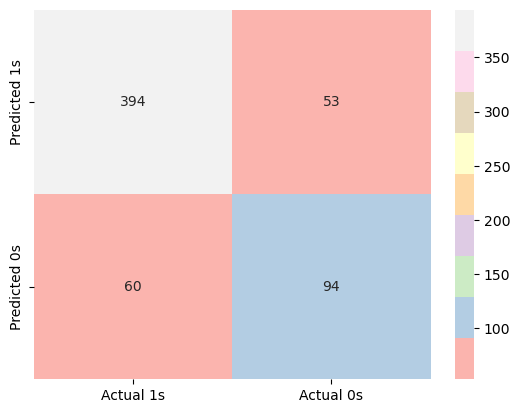

In [235]:
from sklearn.metrics import accuracy_score, precision_score

model = LogisticRegression()
model.fit(X_train, y_train)

# Evaluate the model
y_pred = model.predict(X_test)
#Predict
y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)

#Perfromance Evaluation
train_score = accuracy_score(y_train, y_pred_train)*100
test_score = accuracy_score(y_test, y_pred_test)*100

print("Training Set Accuracy:",str(train_score)+'%')
print("Testing Set Accuracy:",str(test_score)+'%')

print(" -------------------------------------------------------------------------------")
# classification report generation
from sklearn.metrics import classification_report
print("Classification resport - Training Set \n", classification_report(y_train,y_pred_train))
print("Classification resport - Test Set \n", classification_report(y_test,y_pred_test))

print(" -------------------------------------------------------------------------------")
#confusion matrix

model_confusion_matrix=confusion_matrix(y_test,y_pred_test)  


X_label= ['Actual 1s', 'Actual 0s']
Y_labels= ['Predicted 1s', 'Predicted 0s']        

sns.heatmap(model_confusion_matrix,annot=True, fmt = 'g',cmap=plt.get_cmap('Pastel1') , xticklabels= X_label,yticklabels=Y_labels)

print ('\nTrue Positive =' , model_confusion_matrix [0][0])
print (  'False Positive =' , model_confusion_matrix [0][1])
print (  'False Negative =' , model_confusion_matrix [1][0])
print (  'True Negative =' , model_confusion_matrix [1][1])


<b style="font-size:15px">Logistic Regression with PCA </b>

Optimization terminated successfully.
         Current function value: 0.304367
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:              Completed   No. Observations:                 2403
Model:                          Logit   Df Residuals:                     2400
Method:                           MLE   Df Model:                            2
Date:                Sun, 19 Nov 2023   Pseudo R-squ.:                  0.4702
Time:                        21:24:35   Log-Likelihood:                -731.39
converged:                       True   LL-Null:                       -1380.4
Covariance Type:            nonrobust   LLR p-value:                1.364e-282
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -1.7907      0.080    -22.361      0.000      -1.948      -1.634
x1          2.012e-07   1.85e

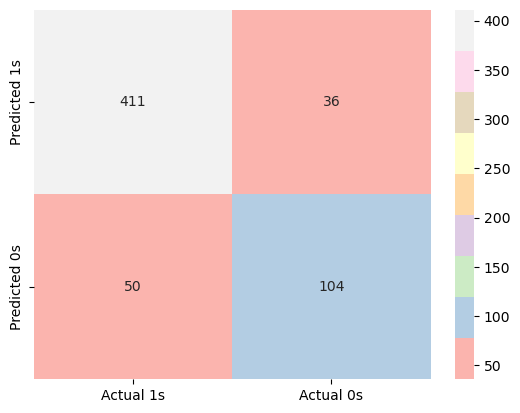

In [241]:
# Convert categorical variables to dummy variables if necessary
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA


#Create and fit PCA object
pca = PCA(n_components=2)
pca.fit(X_train)

#Transforming x_train and x_test 
x_train_pca = pca.transform(X_train)
x_test_pca = pca.transform(X_test)

#Add constant to x_train and x_test
x_train_pca_cst = sm.add_constant(x_train_pca)
x_test_pca_cst = sm.add_constant(x_test_pca)


logit_model = sm.Logit(y_train, x_train_pca_cst)

# Fit logistic regression model using statsmodels
result = logit_model.fit()

# Print the model summary
print(result.summary())

#Training
model = LogisticRegression().fit(x_train_pca_cst, y_train)

#Predict
y_pred_train = model.predict(x_train_pca_cst)
y_pred_test = model.predict(x_test_pca_cst)

#Perfromance Evaluation
train_score = accuracy_score(y_train, y_pred_train)*100
test_score = accuracy_score(y_test, y_pred_test)*100

print("Training Set Accuracy:",str(train_score)+'%')
print("Testing Set Accuracy:",str(test_score)+'%')

# Extract summary and convert it to a DataFrame for easier manipulation
summary_df1 = pd.DataFrame(result.summary2().tables[1])

# Filter significant variables based on p-value <= 0.05
sign_vars_05 = summary_df1[summary_df1['P>|z|'] <= 0.05]

print(" -------------------------------------------------------------------------------")
print("Significant variable: \n", sign_vars_05)

print(" -------------------------------------------------------------------------------")
#classification report
classification_report_str_test = classification_report(y_test, y_pred_test)
classification_report_str_train = classification_report(y_train, y_pred_train)
print("Classification Report for Training Set:\n", classification_report_str_train)
print("Classification Report for Test Set:\n", classification_report_str_test)

print(" -------------------------------------------------------------------------------")


#confusion matrix
matrix_pca = confusion_matrix(y_test, y_pred_test)


X_label= ['Actual 1s', 'Actual 0s']
Y_labels= ['Predicted 1s', 'Predicted 0s']        

sns.heatmap(matrix_pca,annot=True, fmt = 'g',cmap=plt.get_cmap('Pastel1') , xticklabels= X_label,yticklabels=Y_labels)

print ('\nTrue Positive =' , matrix_pca [0][0])
print (  'False Positive =' , matrix_pca [0][1])
print (  'False Negative =' , matrix_pca [1][0])
print (  'True Negative =' , matrix_pca [1][1])



<b style="font-size:15px">Decision Tree Analysis</b>

Training Set Accuracy: 98.59%
Testing Set Accuracy: 98.5%
 -------------------------------------------------------------------------------
Classification Report for Training Set:
               precision    recall  f1-score   support

           0       0.99      0.99      0.99      1775
           1       0.96      0.98      0.97       628

    accuracy                           0.99      2403
   macro avg       0.98      0.98      0.98      2403
weighted avg       0.99      0.99      0.99      2403

Classification Report for Test Set:
               precision    recall  f1-score   support

           0       1.00      0.98      0.99       447
           1       0.95      0.99      0.97       154

    accuracy                           0.99       601
   macro avg       0.97      0.99      0.98       601
weighted avg       0.99      0.99      0.99       601

 -------------------------------------------------------------------------------
Significant Variables: 
         Feature  Import

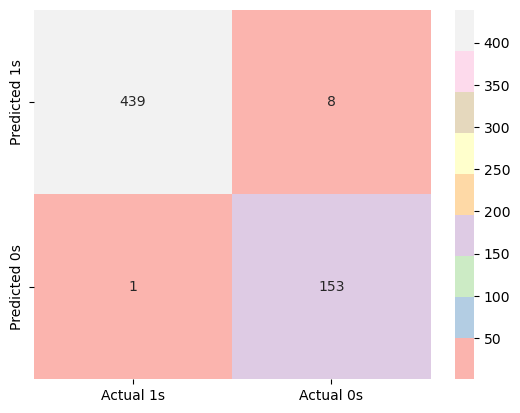

In [237]:
# Fit a Decision Tree model with at most 4 branches
from sklearn.tree import DecisionTreeClassifier

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
tree_model = DecisionTreeClassifier(max_depth=4, random_state=42)
tree_model.fit(X_train, y_train)

# Make predictions on the test set
ytree_pred_test = tree_model.predict(X_test)
ytree_pred_train = tree_model.predict(X_train)

#Perfromance Evaluation
train_score = round(accuracy_score(y_train, ytree_pred_train)*100,2)
test_score = round(accuracy_score(y_test, ytree_pred_test)*100,2)

print("Training Set Accuracy:",str(train_score)+'%')
print("Testing Set Accuracy:",str(test_score)+'%')

print(" -------------------------------------------------------------------------------")
#classification report
classification_report_str_test = classification_report(y_test, ytree_pred_test)
classification_report_str_train = classification_report(y_train, ytree_pred_train)
print("Classification Report for Training Set:\n", classification_report_str_train)
print("Classification Report for Test Set:\n", classification_report_str_test)

print(" -------------------------------------------------------------------------------")


# Get feature importances
importances = tree_model.feature_importances_

# Create a DataFrame for easier visualization
feature_importances = pd.DataFrame({'Feature': X.columns, 'Importance': importances})

# Sort the DataFrame by importance
feature_importances.sort_values(by='Importance', ascending=False, inplace=True)

print("Significant Variables: \n",feature_importances)

print(" -------------------------------------------------------------------------------")

#confusion matrix
matrix_dt = confusion_matrix(y_test, ytree_pred_test)


X_label= ['Actual 1s', 'Actual 0s']
Y_labels= ['Predicted 1s', 'Predicted 0s']        

sns.heatmap(matrix_dt,annot=True, fmt = 'g',cmap=plt.get_cmap('Pastel1') , xticklabels= X_label,yticklabels=Y_labels)

print ('\nTrue Positive =' , matrix_dt [0][0])
print (  'False Positive =' , matrix_dt [0][1])
print (  'False Negative =' , matrix_dt [1][0])
print (  'True Negative =' , matrix_dt [1][1])


